<a href="https://colab.research.google.com/github/manishbhnau/Repo/blob/master/adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Credit.csv to Credit.csv


In [2]:
import pandas as pd
#read in the data using pandas
df = pd.read_csv("Credit.csv")
#check data has been read in properly
col=df.columns.tolist()
print (col)

['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance', 'Defaultee']


In [3]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["Ethnicity_code"] = lb_make.fit_transform(df["Ethnicity"])
df["Student_code"] = lb_make.fit_transform(df["Student"])
df["Married_code"] = lb_make.fit_transform(df["Married"])
df["Cards_code"] = lb_make.fit_transform(df["Cards"])
df["Gender_code"] = lb_make.fit_transform(df["Gender"])
df[["Ethnicity", "Ethnicity_code", "Student", "Student_code", "Married", "Married_code", "Cards", "Cards_code", "Gender", "Gender_code"]].head(5)

,Ethnicity,Ethnicity_code,Student,Student_code,Married,Married_code,Cards,Cards_code,Gender,Gender_code
0,Caucasian,2,No,0,Yes,1,2,1,Male,1
1,Asian,1,Yes,1,Yes,1,3,2,Female,0
2,Asian,1,No,0,No,0,4,3,Male,1
3,Asian,1,No,0,No,0,3,2,Female,0
4,Caucasian,2,No,0,Yes,1,2,1,Male,1


In [4]:
y=df["Defaultee"].values; y=y.astype(int)
dftemp=df.drop(columns=["Defaultee", "Ethnicity", "Married", "Student", "Cards", "Gender"])
X=dftemp.values; X=X.astype(int)
X_test, y_test=X[-80:], y[-80:]
X, y=X[:-80], y[:-80]
print (X[:5], y[:5])
print (X.shape, y.shape)

[[   1   14 3606  283   34   11  333    2    0    1    1    1]
 [   2  106 6645  483   82   15  903    1    1    1    2    0]
 [   3  104 7075  514   71   11  580    1    0    0    3    1]
 [   4  148 9504  681   36   11  964    1    0    0    2    0]
 [   5   55 4897  357   68   16  331    2    0    1    1    1]] [0 0 0 0 0]
(320, 12) (320,)


In [17]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=10, random_state=0)
clf.fit(X, y)
#clf.predict([[1,  14, 3606,  283,   34,  11,  333,  2,  0,  1,  1,  1]])
clf.score(X, y)

1.0

In [18]:
pred=clf.predict(X_test)
print (y_test)
print (pred)
type(pred)
pred.shape

[0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0]
[0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0]


(80,)

### **Confusion matrix, plot and roc curve**

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[64,  0],
       [ 1, 15]])

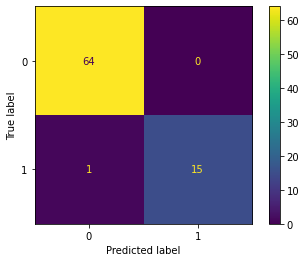

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)# doctest: +SKIP
plt.show()

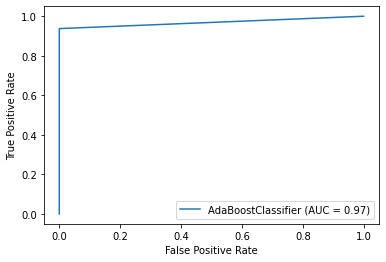

In [9]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  

## **Assignment**

In [11]:
xl="https://raw.githubusercontent.com/saireddyavs/machine-learning/master/iris.xlsx"
dfIris=pd.read_csv(xl)
col=dfIris.columns.tolist()
print ("columns :", col)
print (dfIris.head(5))
print (dfIris.shape)
print ("classes are : ", set(dfIris["Iris-setosa"].tolist()))

columns : ['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
(149, 5)
classes are :  {'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


## **for Naive Bayes Classifier and KNN.**

## **Encode "Iris-setosa"; This is the label class**

## **Creating Traing and testing dataset**

## **Train with 10 fold cross validation**

## **Predict on Test data and report test statistics**

## **Plot Confusion matrix**